<hr style="border:0.2px solid black"> </hr>

<figure>
  <IMG SRC="img/ntnu_logo.png" WIDTH=250 ALIGN="right">
</figure>

**<ins>Course:</ins>** TVM4174 - Hydroinformatics for Smart Water Systems

# <ins>Example 2:</ins> Plotting the Hazen-Williams head loss equation for pipes
    
*Developed by David Steffelbauer*

<hr style="border:0.2px solid black"> </hr>

Hazen-Williams head loss formula

$ \Delta h \ = \ \frac{10.67 \cdot Q^{1.852}}{C^{1.852} d^{4.8704}} \cdot L $

In [24]:
import numpy as np
import pandas as pd

In [18]:
# Parameters we define
Q = np.linspace(0, 0.001, 11) # Flow in [m^3/s]

In [90]:
# Headloss

def hazenwilliams(Q, C=140, d=0.25, L=50):

    dH = -(10.67 * Q ** 1.852) / (C ** 1.852 * d ** 4.8704) * L
    
    return dH


dH = hazenwilliams(Q, C=130)

In [22]:
for ci in [120, 130, 140]:
    dH = hazenwilliams(Q, C=ci)


120
[0.00000000e+00 2.51630765e-06 9.08387794e-06 1.92482966e-05
 3.27928258e-05 4.95742538e-05 6.94864066e-05 9.24454004e-05
 1.18382197e-04 1.47238324e-04 1.78963200e-04]
130
[0.00000000e+00 2.16962320e-06 7.83234608e-06 1.65963613e-05
 2.82747921e-05 4.27441579e-05 5.99129126e-05 7.97087296e-05
 1.02072082e-04 1.26952555e-04 1.54306534e-04]
140
[0.00000000e+00 1.89137778e-06 6.82787930e-06 1.44679449e-05
 2.46486642e-05 3.72623921e-05 5.22293233e-05 6.94864066e-05
 8.89817493e-05 1.10671402e-04 1.34517344e-04]


In [32]:
df = pd.read_csv('data/C_factors.csv', decimal=',', sep=';', index_col=0)

In [33]:
df.shape

(14, 2)

In [48]:
df['High']['Asbestos-cement']

140

In [56]:
mean_c = df.mean(axis=1)

In [63]:
mean_c.iloc[1:6]

Material
Cast iron new         130.0
Cast iron 10 years    110.0
Cast iron 20 years     94.5
Cast iron 30 years     82.5
Cast iron 40 years     73.5
dtype: float64

In [71]:

castnames = []
for name in mean_c.index:
    if name.startswith('Cast'):
#         print(name)
        castnames.append(name)
#     else:
#         print('-> no cast iron', name)

print(castnames)
mean_c[castnames]

['Cast iron\xa0new', 'Cast iron\xa010 years', 'Cast iron\xa020 years', 'Cast iron\xa030 years', 'Cast iron\xa040 years']


Material
Cast iron new         130.0
Cast iron 10 years    110.0
Cast iron 20 years     94.5
Cast iron 30 years     82.5
Cast iron 40 years     73.5
dtype: float64

In [77]:
castnames = mean_c[[name.startswith('Cast') for name in mean_c.index]]

In [78]:
castnames

Material
Cast iron new         130.0
Cast iron 10 years    110.0
Cast iron 20 years     94.5
Cast iron 30 years     82.5
Cast iron 40 years     73.5
dtype: float64

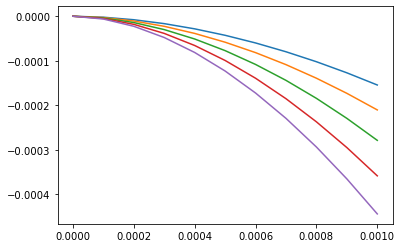

In [91]:
import matplotlib.pyplot as plt

for c_value in castnames:
    dH = hazenwilliams(Q, C=c_value)
    plt.plot(Q, dH)